In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('preprocessed_dataset.csv')

In [2]:
df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Power[W],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,-0.952389,-0.947360,0.068185,0.282200,-1.695984,0.629443,0,0,0,0,0,0
1,0,-0.902393,-0.879959,-0.729472,0.633308,-1.648852,0.512456,0,0,0,0,0,0
2,0,-0.952389,-1.014761,-0.227450,0.944290,-1.617430,1.376889,0,0,0,0,0,0
3,0,-0.902393,-0.947360,-0.590021,-0.048845,-1.586009,-0.330009,0,0,0,0,0,0
4,0,-0.902393,-0.879959,-0.729472,0.001313,-1.554588,-0.357824,0,0,0,0,0,0


In [3]:
df.rename(columns = {'Rotational speed [rpm]':'Rotational speed',
                     'Air temperature [K]':'Air temperature',
                     'Process temperature [K]':'Process temperature',
                     'Torque [Nm]':'torque',
                     'Tool wear [min]':'Tool wear',
                     'Power[W]':'Power'}, inplace = True)
df.head()

,Type,Air temperature,Process temperature,Rotational speed,torque,Tool wear,Power,Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,-0.952389,-0.947360,0.068185,0.282200,-1.695984,0.629443,0,0,0,0,0,0
1,0,-0.902393,-0.879959,-0.729472,0.633308,-1.648852,0.512456,0,0,0,0,0,0
2,0,-0.952389,-1.014761,-0.227450,0.944290,-1.617430,1.376889,0,0,0,0,0,0
3,0,-0.902393,-0.947360,-0.590021,-0.048845,-1.586009,-0.330009,0,0,0,0,0,0
4,0,-0.902393,-0.879959,-0.729472,0.001313,-1.554588,-0.357824,0,0,0,0,0,0


In [4]:
#Defining input features and target variable
X = df.drop(columns = ['Type', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'])
y= df['Machine failure']

In [5]:
print("input feature")
X.head()

input feature


,Air temperature,Process temperature,Rotational speed,torque,Tool wear,Power
0,-0.952389,-0.947360,0.068185,0.282200,-1.695984,0.629443
1,-0.902393,-0.879959,-0.729472,0.633308,-1.648852,0.512456
2,-0.952389,-1.014761,-0.227450,0.944290,-1.617430,1.376889
3,-0.902393,-0.947360,-0.590021,-0.048845,-1.586009,-0.330009
4,-0.902393,-0.879959,-0.729472,0.001313,-1.554588,-0.357824


In [6]:
print("Target Variable")
y.head()

Target Variable


0    0
1    0
2    0
3    0
4    0
Name: Machine failure, dtype: int64

In [7]:
from sklearn.model_selection import train_test_split

#splitting into training and test set for validation and testing set
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

#Again split into validation and test set
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [8]:
X_train.shape

(6596, 6)

In [9]:
X_val.shape

(1414, 6)

In [10]:
X_val

,Air temperature,Process temperature,Rotational speed,torque,Tool wear,Power
5983,-0.002465,-0.340752,1.897775,-1.764260,-0.454840,-1.753976
8681,-1.152374,-0.812558,-0.389212,0.372485,-0.187758,0.414826
6856,-0.002465,0.265856,-0.857766,1.215145,0.314983,1.196100
1346,-0.602417,-0.138549,-0.026641,-0.299637,-0.957582,-0.314851
2455,-0.302441,-0.542955,0.458646,-0.550428,-0.941871,-0.396626
...,...,...,...,...,...,...
4834,2.197361,2.422684,0.257838,-0.109035,-1.554588,0.165743
4248,1.247436,0.198455,0.001249,-0.099004,0.173587,0.005284
5057,1.447420,1.479072,-0.389212,0.201946,1.666102,0.169815
5817,0.497496,0.602860,0.084919,-0.730998,-0.769054,-0.897844


In [11]:
X_test.shape

(1414, 6)

In [12]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training set only for the main target
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)


In [13]:
#Checking class distribution before and after applying SMOTE
print("Class distribution before SMOTE:\n", y_train.value_counts())
print("Class distribution after SMOTE:\n", y_train_sm.value_counts())

Class distribution before SMOTE:
 0    6428
1     168
Name: Machine failure, dtype: int64
Class distribution after SMOTE:
 0    6428
1    6428
Name: Machine failure, dtype: int64


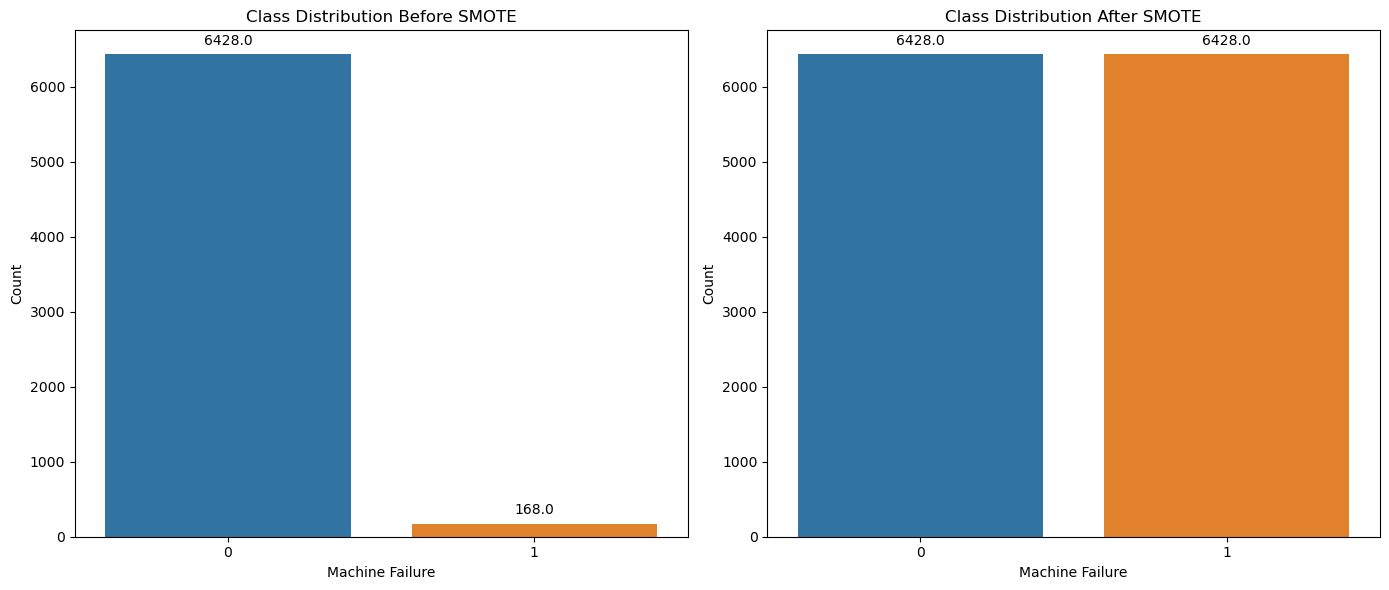

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing the class distribution before and after SMOTE
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Before SMOTE
sns.countplot(x=y_train, ax=ax[0])
ax[0].set_title('Class Distribution Before SMOTE')
ax[0].set_xlabel('Machine Failure')
ax[0].set_ylabel('Count')

# Adding the counts on top of the bars before SMOTE
for p in ax[0].patches:
    ax[0].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# After SMOTE
sns.countplot(x=y_train_sm, ax=ax[1])
ax[1].set_title('Class Distribution After SMOTE')
ax[1].set_xlabel('Machine Failure')
ax[1].set_ylabel('Count')

# Adding the counts on top of the bars after SMOTE
for p in ax[1].patches:
    ax[1].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()



In [15]:
print(f"Training set shape: {X_train_sm.shape, y_train_sm.shape}")
print(f"Validation set shape: {X_val.shape, y_val.shape}")
print(f"Test set shape: {X_test.shape, y_test.shape}")

Training set shape: ((12856, 6), (12856,))
Validation set shape: ((1414, 6), (1414,))
Test set shape: ((1414, 6), (1414,))


In [16]:
import joblib
# Save the resampled training data, and the original validation and test sets
joblib.dump((X_train_sm, X_val, X_test, y_train_sm, y_val, y_test), 'split_data.pkl')

['split_data.pkl']

In [17]:
y_val.value_counts()




0    1372
1      42
Name: Machine failure, dtype: int64

In [18]:
y_test.value_counts()

0    1392
1      22
Name: Machine failure, dtype: int64